In [ ]:
# Original paper: Molecularly defined and spatially resolved cell atlas of the whole mouse brain Xiaowei Zhuang, et al. 2023.
# https://www.nature.com/articles/s41586-023-06808-9
# Location at BIL /bil/data/29/3c/293cc39ceea87f6d 
# Location of this sample (mouse4 sagittal): /bil/data/29/3c/293cc39ceea87f6d/processed_data/counts_updated/counts_mouse4_sagittal.h5ad

In [1]:
# Load the package
library(Giotto)

Loading required package: GiottoClass

Giotto Suite 4.2.1



In [3]:
# Check that the Giotto python environment is installed 
checkGiottoEnvironment()

Giotto can access environment found at:
 '/opt/r-miniconda/envs/giotto_env/bin/python'

 If this is the wrong environment, try specifying `envname` param
 or set option "giotto.py_path" with the desired envname or path



[1] TRUE

In [2]:
# Read data
g <- anndataToGiotto("counts_mouse4_sagittal.h5ad",
                    python_path = NULL)
# If the Giotto environment is not automatically detected, use: python_path = '/opt/r-miniconda/envs/giotto_env/bin/python'

a giotto python environment was found

Using python path:
 "/opt/r-miniconda/envs/giotto_env/bin/python"

There are non numeric or integer columns for the spatial location
 input at column position(s): 1
 The first non-numeric column will be considered as a cell ID
 to test for consistency with the expression matrix
 Other non numeric columns will be removed


List item [1]:
 spat_unit: cell
 feat_type: rna

> Cell metadata for spat_unit " cell " and feat_type " rna " already exists and
 will be replaced with new metadata.

Setting cell metadata [cell][rna]

list depth of 2


List item [1]:
 spat_unit: cell
 feat_type: rna

> Feat metadata for spat_unit " cell " and feat_type " rna " already exists and
 will be replaced with new metadata.

Setting feature metadata [cell][rna]


AnnData object successfully converted to Giotto.



In [3]:
# Show object metadata
cell_metadata <- pDataDT(g)

head(cell_metadata)

cell_ID,fov,volume,center_x,center_y,sample_id,slice_id,fov_x,fov_y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
104367712102725177087239619995470724493,2,600.9530,4683.354,304.6082,sa2_sample2,sa2_slice2,4656.5,139.2
177536119734259275144748435471942472531,2,265.7511,4688.833,310.3587,sa2_sample2,sa2_slice2,4656.5,139.2
256532006537596385088807329967308781746,2,510.2737,4697.296,348.0082,sa2_sample2,sa2_slice2,4656.5,139.2
28801318882950773770397006451868070066,2,452.6080,4671.473,291.1000,sa2_sample2,sa2_slice2,4656.5,139.2
301971869963235435117242882149875853185,2,110.6657,4670.496,284.9155,sa2_sample2,sa2_slice2,4656.5,139.2
59529179184649485193875612467056571460,2,610.4196,4685.849,294.4092,sa2_sample2,sa2_slice2,4656.5,139.2


In [5]:
# Get the expression matrix dimensions
dim(getExpression(g)) # 1147 genes 215 300 cells

[1]   1147 215300

In [4]:
# Add the spatial information to the object
spatlocs <- data.frame(sdimx = cell_metadata$center_x,
                       sdimy = cell_metadata$center_y,
                       cell_ID = cell_metadata$cell_ID)

spatLocsObj <- createSpatLocsObj(coordinates = spatlocs,
                                 name = "raw")

g <- setSpatialLocations(g,
                         x = spatLocsObj)

There are non numeric or integer columns for the spatial location
 input at column position(s): 3
 The first non-numeric column will be considered as a cell ID
 to test for consistency with the expression matrix
 Other non numeric columns will be removed

> raw already exists and will be replaced with new spatial
 locations

Setting spatial locations [cell] raw



In [8]:
# Check instructions
instructions(g, "save_plot")
instructions(g, "show_plot")

[1] FALSE

[1] TRUE

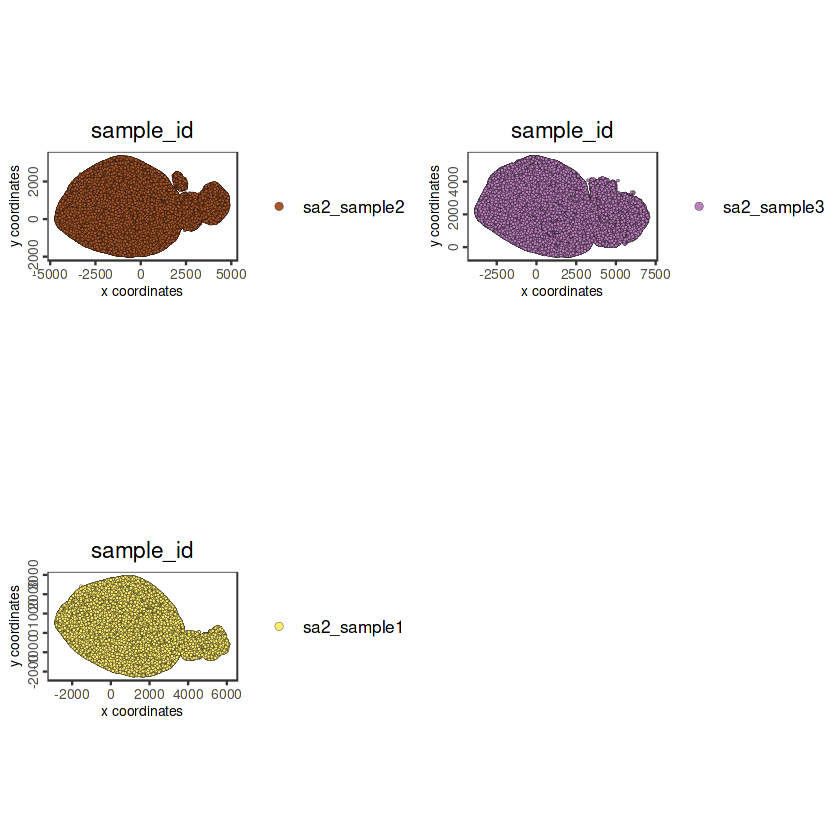

In [9]:
# Plot samples
spatPlot2D(g,
           group_by = "slice_id",
           cell_color = "sample_id",
           point_size = 0.5)

In [5]:
# Subset to keep only sample 1
g_s1 <- subsetGiotto(g,
                     cell_ids = cell_metadata[cell_metadata$sample_id == "sa2_sample1",]$cell_ID)

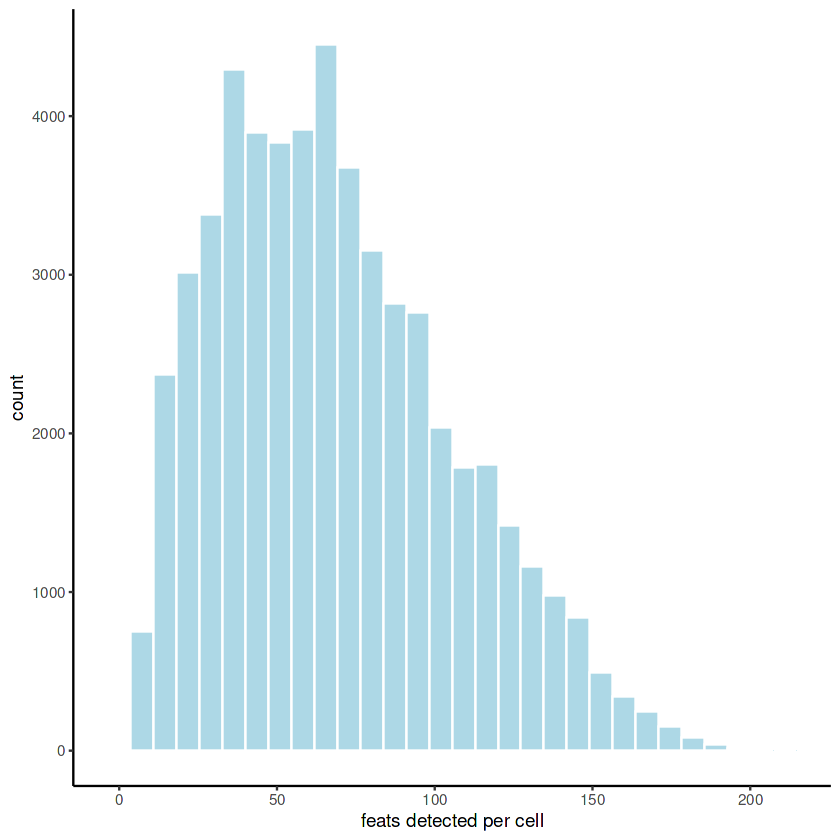

In [11]:
# Quality control
filterDistributions(g_s1,
                    detection = "cells")

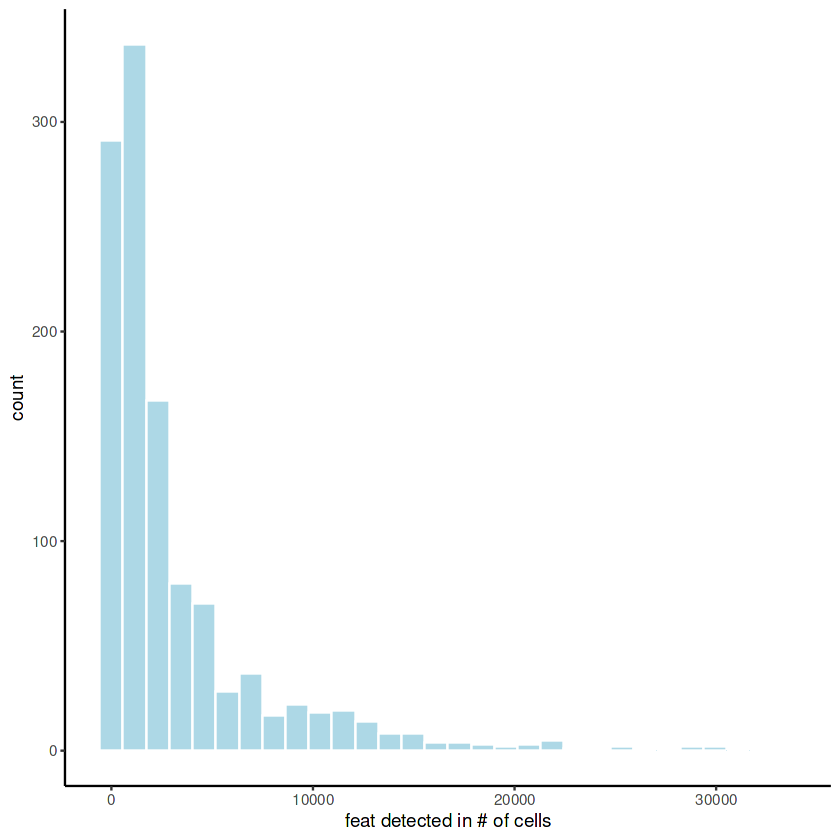

In [12]:
filterDistributions(g_s1,
                    detection = "feats")

calculating statistics for "raw" expression



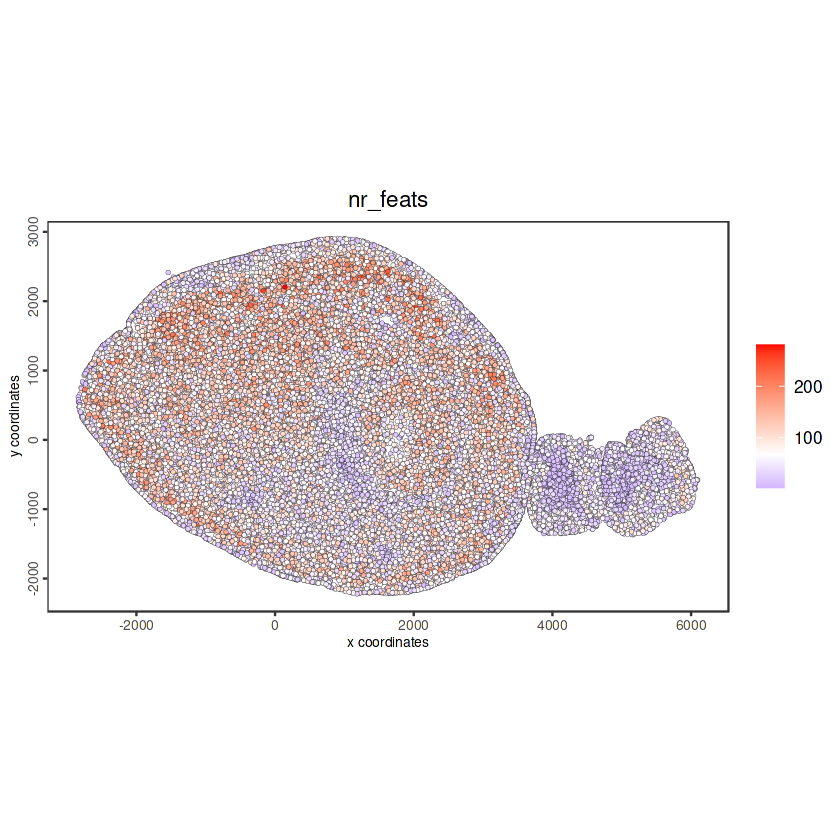

In [13]:
# add statistics
g_s1_stats <- addStatistics(g_s1,
                            expression_values = "raw")

spatPlot2D(g_s1_stats,
           cell_color = "nr_feats",
           color_as_factor = FALSE,
           point_size = 1)

In [6]:
# Filtering
g_s1 <- filterGiotto(g_s1,
                     min_det_feats_per_cell = 10,
                     feat_det_in_min_cells = 100)

completed 1: preparation

completed 2: subset expression data

completed 3: subset spatial locations

completed 4: subset cell metadata

completed 5: subset feature metadata

completed 6: subset spatial network(s)

completed 7: subsetted dimension reductions

completed 8: subsetted nearest network(s)

completed 9: subsetted spatial enrichment results




Feature type:  rna 
Number of cells removed:  547  out of  53723 
Number of feats removed:  0  out of  1147 


In [7]:
# Normalization
g_s1 <- normalizeGiotto(g_s1)

first scale feats and then cells

Setting expression [cell][rna] normalized

Setting expression [cell][rna] scaled



"hvf" was not found in the gene metadata information.
 all genes will be used.

Setting dimension reduction [cell][rna] pca

PCA with name: pca already exists and will be used for the screeplot



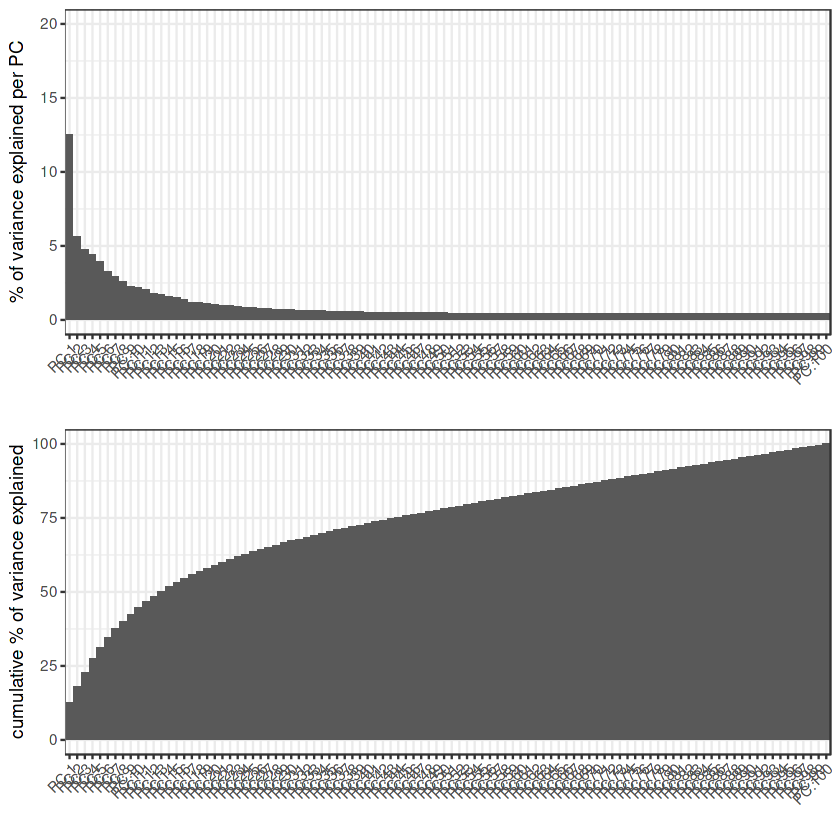

In [8]:
# Dimension reduction (PCA)
g_s1 <- runPCA(g_s1)

screePlot(g_s1)

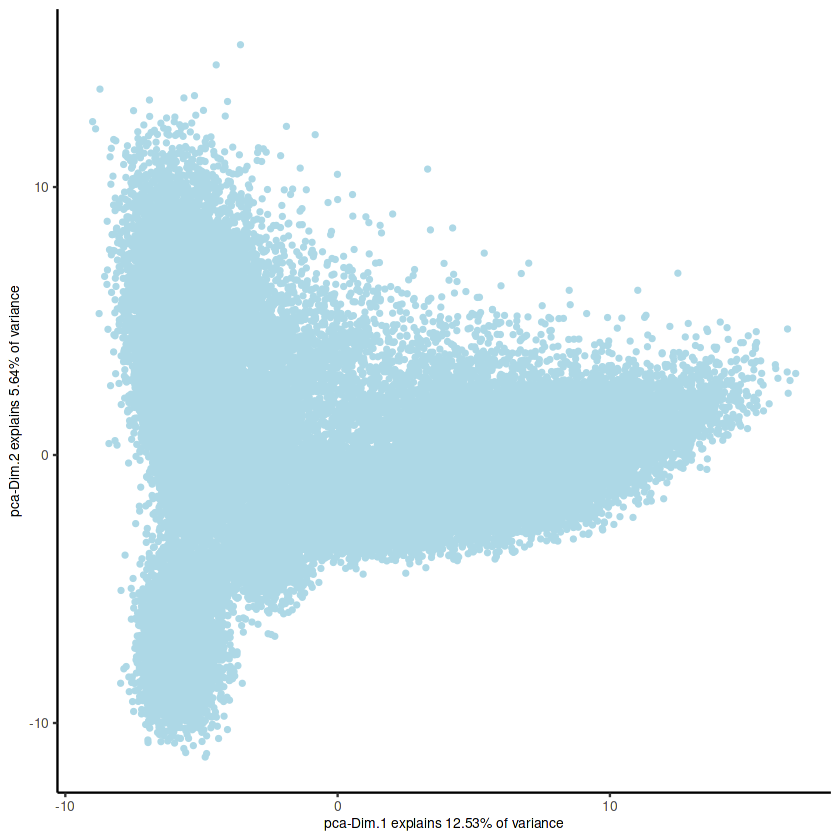

In [17]:
plotPCA(g_s1)

In [9]:
# UMAP
g_s1 <- runUMAP(g_s1)

Setting dimension reduction [cell][rna] umap



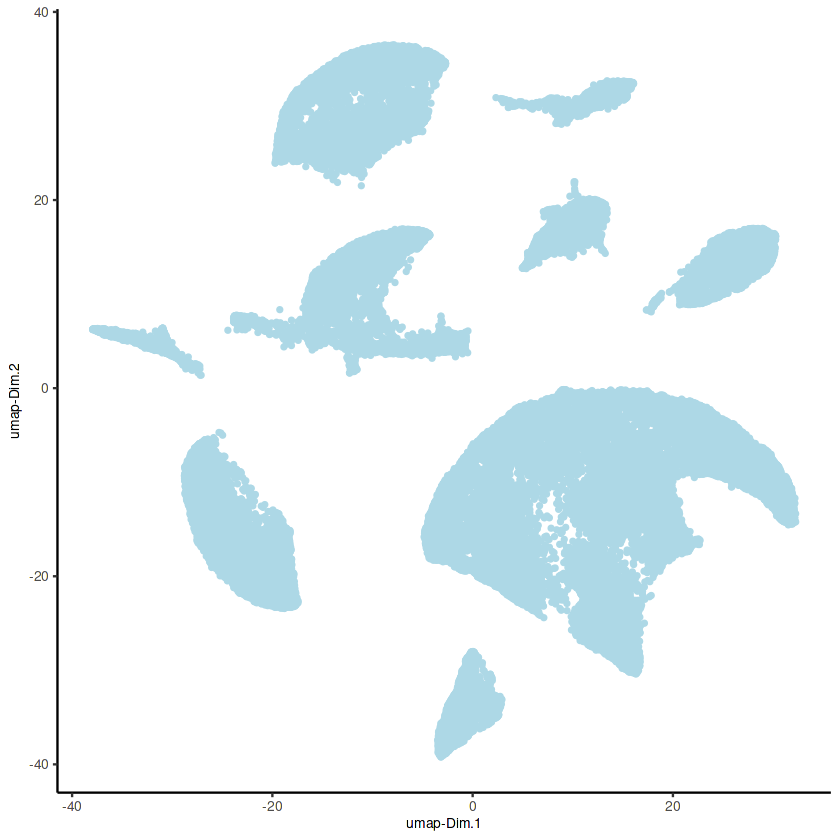

In [10]:
plotUMAP(g_s1)

In [11]:
# tSNE
g_s1 <- runtSNE(g_s1)

Setting dimension reduction [cell][rna] tsne



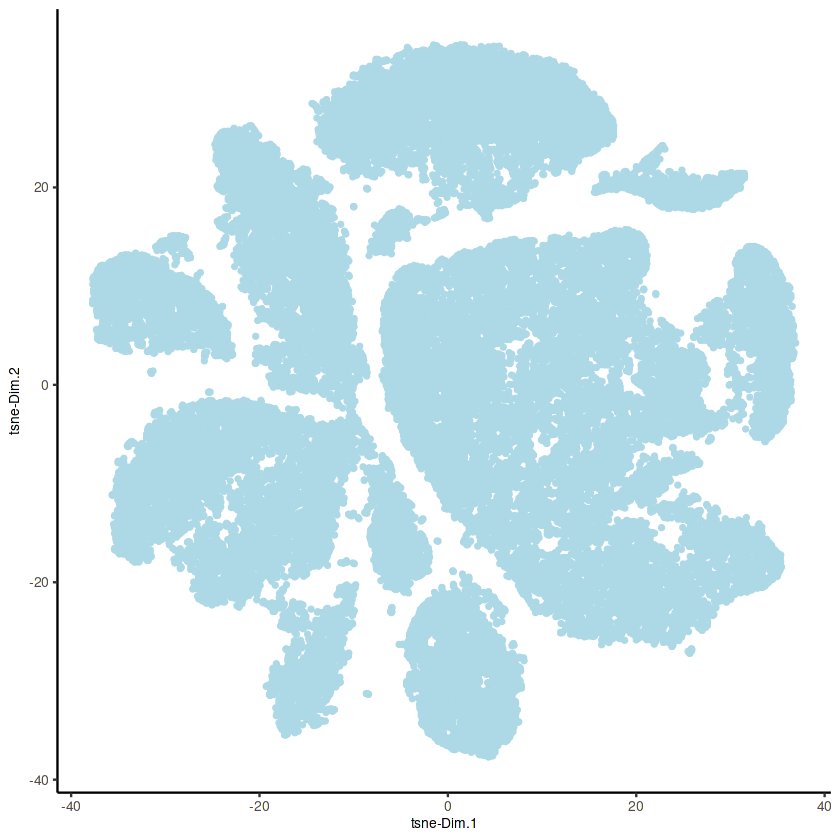

In [12]:
plotTSNE(g_s1)

In [14]:
# Nearest network
g_s1 <- createNearestNetwork(g_s1)

In [15]:
# Leiden clustering (this step may take some time to run)
g_s1 <- doLeidenCluster(g_s1)

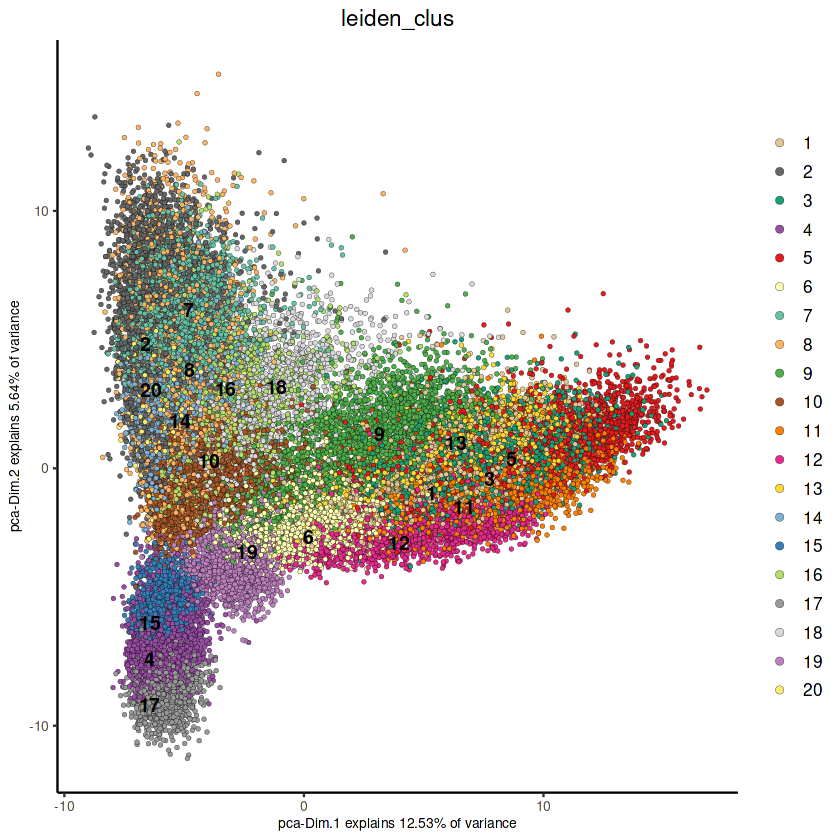

In [26]:
# Visualization
plotPCA(g_s1,
        cell_color = "leiden_clus",
        save_plot = TRUE)

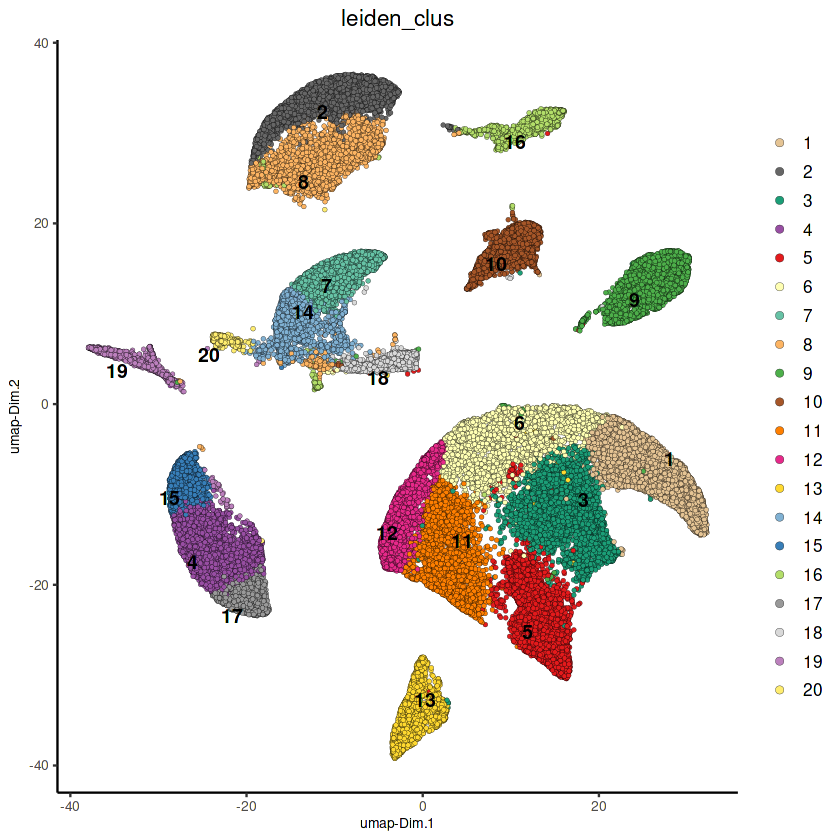

In [27]:
plotUMAP(g_s1,
         cell_color = "leiden_clus",
         save_plot = TRUE)

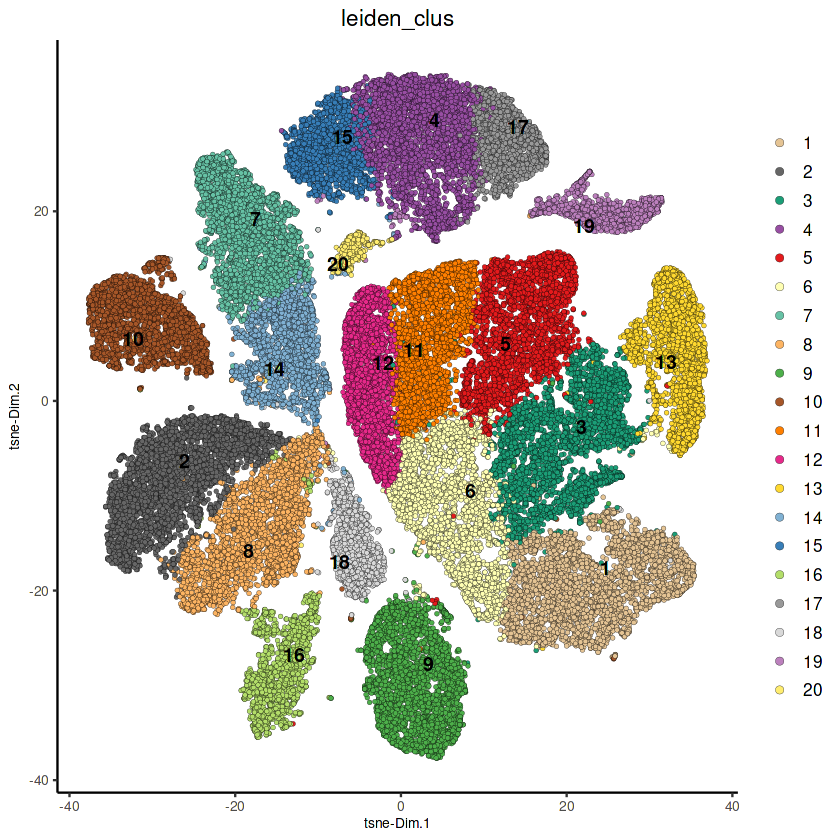

In [28]:
plotTSNE(g_s1,
         cell_color = "leiden_clus",
         save_plot = TRUE)

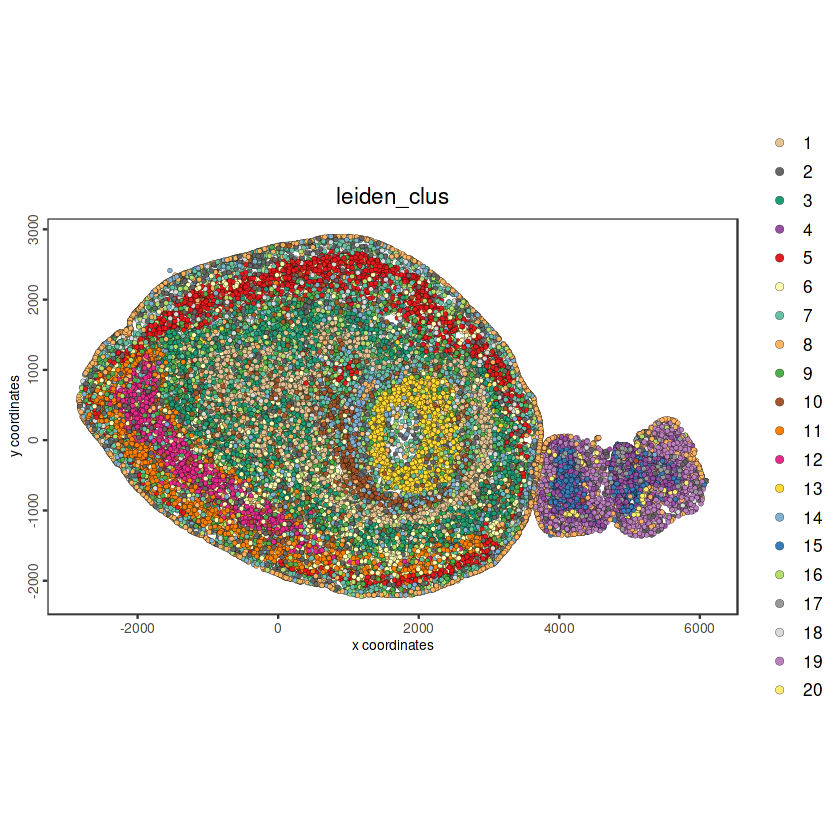

In [29]:
spatPlot2D(g_s1,
           cell_color = "leiden_clus",
           save_plot = TRUE,
           point_size = 1)

In [16]:
markers_scran <- findMarkers_one_vs_all(gobject = g_s1,
                                        method = "scran",
                                        expression_values = "normalized",
                                        cluster_column = "leiden_clus",
                                        min_feats = 10)

topgenes_scran <- markers_scran[, head(.SD, 10), by = "cluster"]$feats

using 'Scran' to detect marker feats. If used in published
      research, please cite: Lun ATL, McCarthy DJ, Marioni JC (2016).
      'A step-by-step workflow for low-level analysis of single-cell RNA-seq
      data with Bioconductor.'
      F1000Res., 5, 2122. doi: 10.12688/f1000research.9501.2. 



start with cluster  1start with cluster  2start with cluster  3start with cluster  4start with cluster  5start with cluster  6start with cluster  7start with cluster  8start with cluster  9start with cluster  10start with cluster  11start with cluster  12start with cluster  13start with cluster  14start with cluster  15start with cluster  16start with cluster  17start with cluster  18start with cluster  19start with cluster  20

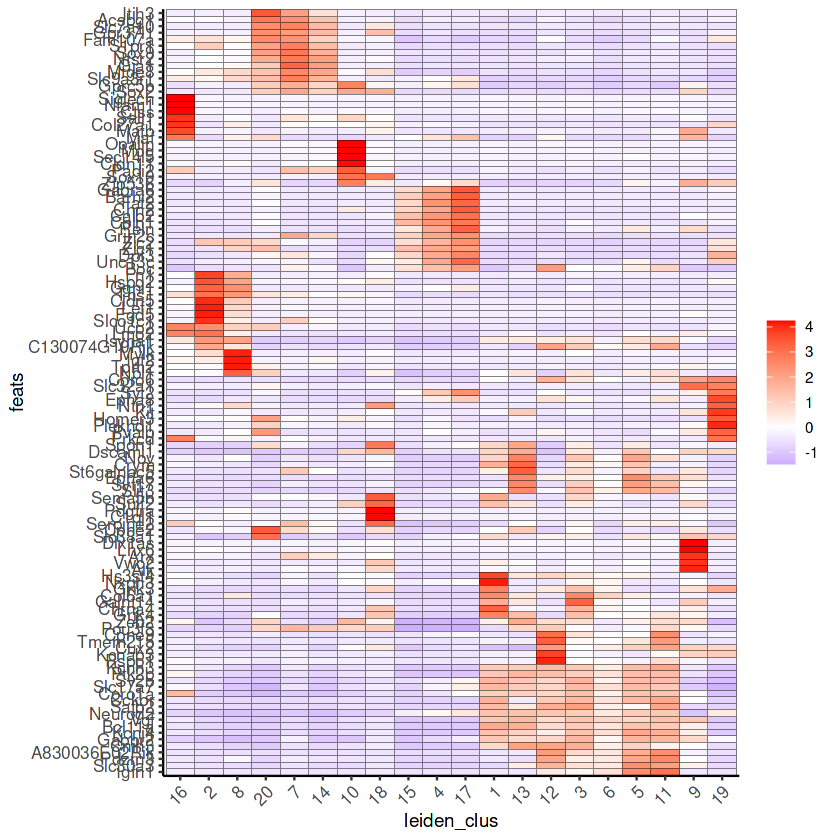

In [20]:
# Plot marker genes' expression
plotMetaDataHeatmap(g_s1,
                    selected_feats = unique(topgenes_scran),
                    metadata_cols = "leiden_clus",
                    return_plot = FALSE)